In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
keras = tf.keras
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import random
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import warnings
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from helpers import balance_train_data, plot_cross_val

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/clean/Breyer.csv')
data['cleanText'] = data['cleanText'].fillna(' ')

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
models = [LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier(), SVC()]
plot_cross_val(models, data, ax, names=[m.__class__.__name__ for m in models], sampling_method=None )
ax.set_title('Breyer - No Balancing')
ax.legend()
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('# of Folds')

Text(0.5, 0, '# of Folds')

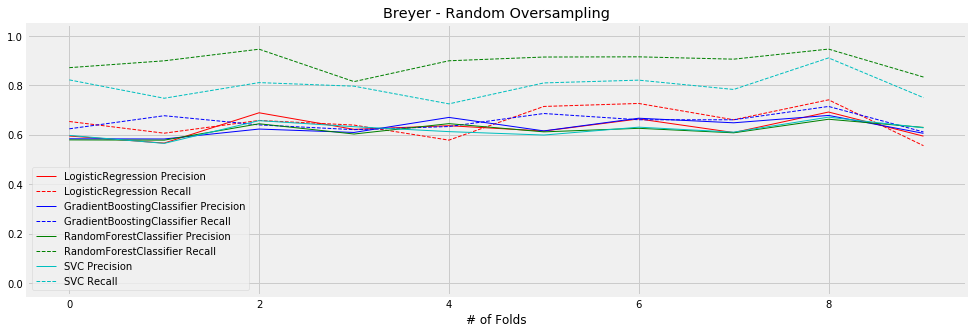

In [26]:
fig, ax = plt.subplots(figsize=(15, 5))
models = [LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier(), SVC()]
plot_cross_val(models, data, ax, 'oversampling')
ax.set_title('Breyer - Random Oversampling')
ax.legend()
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('# of Folds')

Text(0.5, 0, '# of Folds')

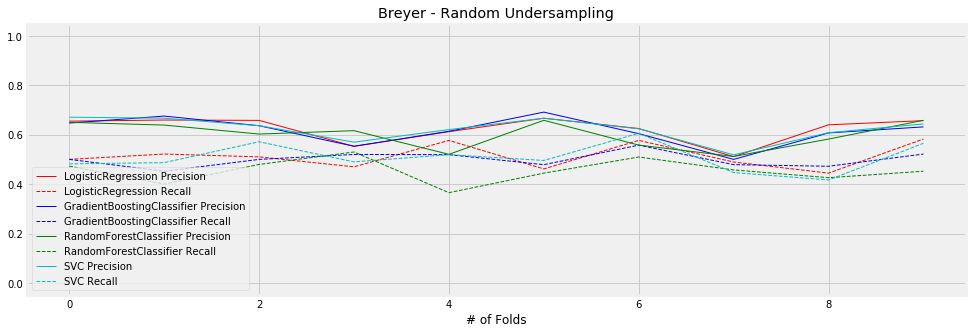

In [27]:
fig, ax = plt.subplots(figsize=(15, 5))
models = [LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier(), SVC()]
plot_cross_val(models, data, ax, names=[m.__class__.__name__ for m in models], sampling_method='undersampling')
ax.set_title('Breyer - Random Undersampling')
ax.legend()
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('# of Folds')

Text(0.5, 0, '# of Folds')

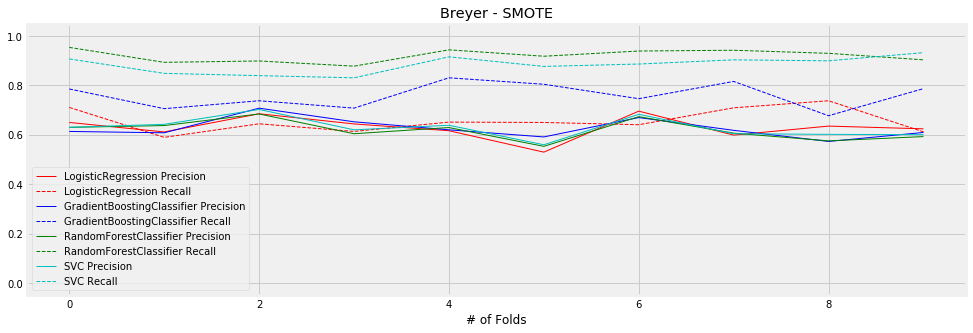

In [28]:
fig, ax = plt.subplots(figsize=(15, 5))
models = [LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier(), SVC()]
plot_cross_val(models, data, ax, names=[m.__class__.__name__ for m in models], sampling_method='smote')
ax.set_title('Breyer - SMOTE')
ax.legend()
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('# of Folds')

Text(0.5, 0, '# of Folds')

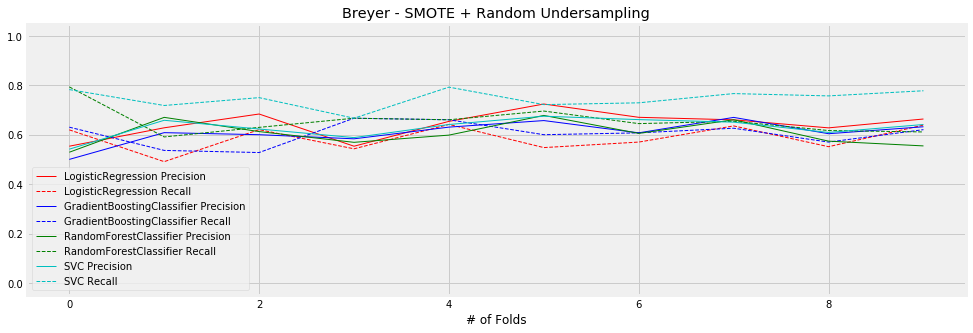

In [29]:
fig, ax = plt.subplots(figsize=(15, 5))
models = [LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier(), SVC()]
plot_cross_val(models, data, ax, names=[m.__class__.__name__ for m in models], sampling_method='both')
ax.set_title('Breyer - SMOTE + Random Undersampling')
ax.legend()
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('# of Folds')

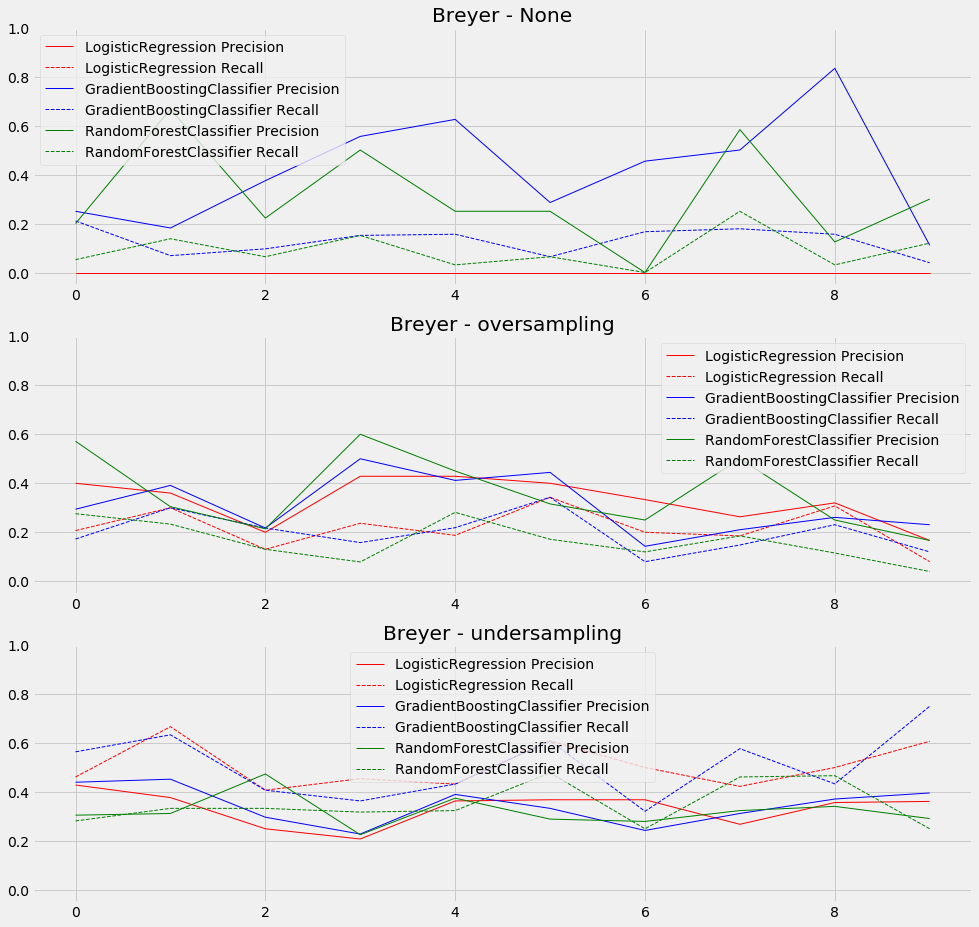

In [144]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

methods = [None, 'oversampling', 'undersampling']

for i, method in enumerate(methods):
    data = pd.read_csv('data/clean/Alito.csv')
    data['cleanText'] = data['cleanText'].fillna(' ')
    models = [LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier()]
    plot_cross_val(models, data, ax[i], names=[m.__class__.__name__ for m in models], sampling_method=method)
    ax[i].set_title('Alito - %s' % (str(method)))
    ax[i].legend()
    ax[i].set_ylim(-0.05, 1)
    
    

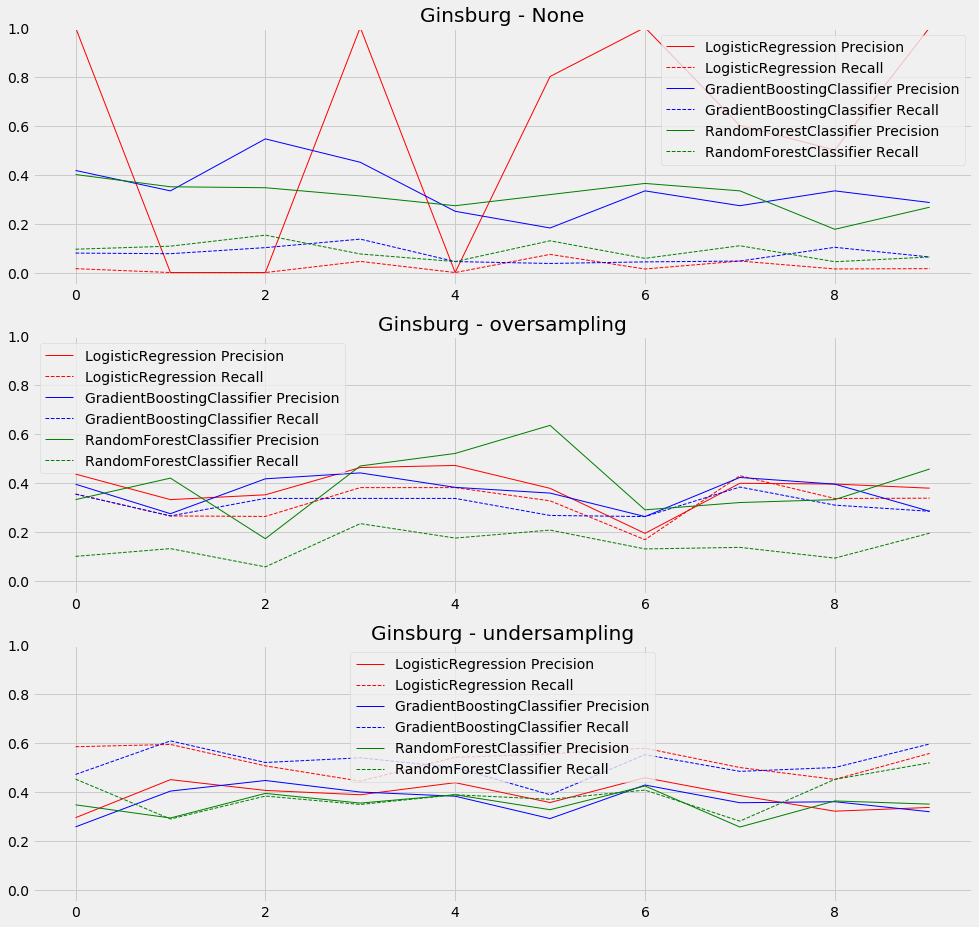

In [145]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

methods = [None, 'oversampling', 'undersampling']

for i, method in enumerate(methods):
    data = pd.read_csv('data/clean/Ginsburg.csv')
    data['cleanText'] = data['cleanText'].fillna(' ')
    models = [LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier()]
    plot_cross_val(models, data, ax[i], names=[m.__class__.__name__ for m in models], sampling_method=method)
    ax[i].set_title('Ginsburg - %s' % (str(method)))
    ax[i].legend()
    ax[i].set_ylim(-0.05, 1)
    
    

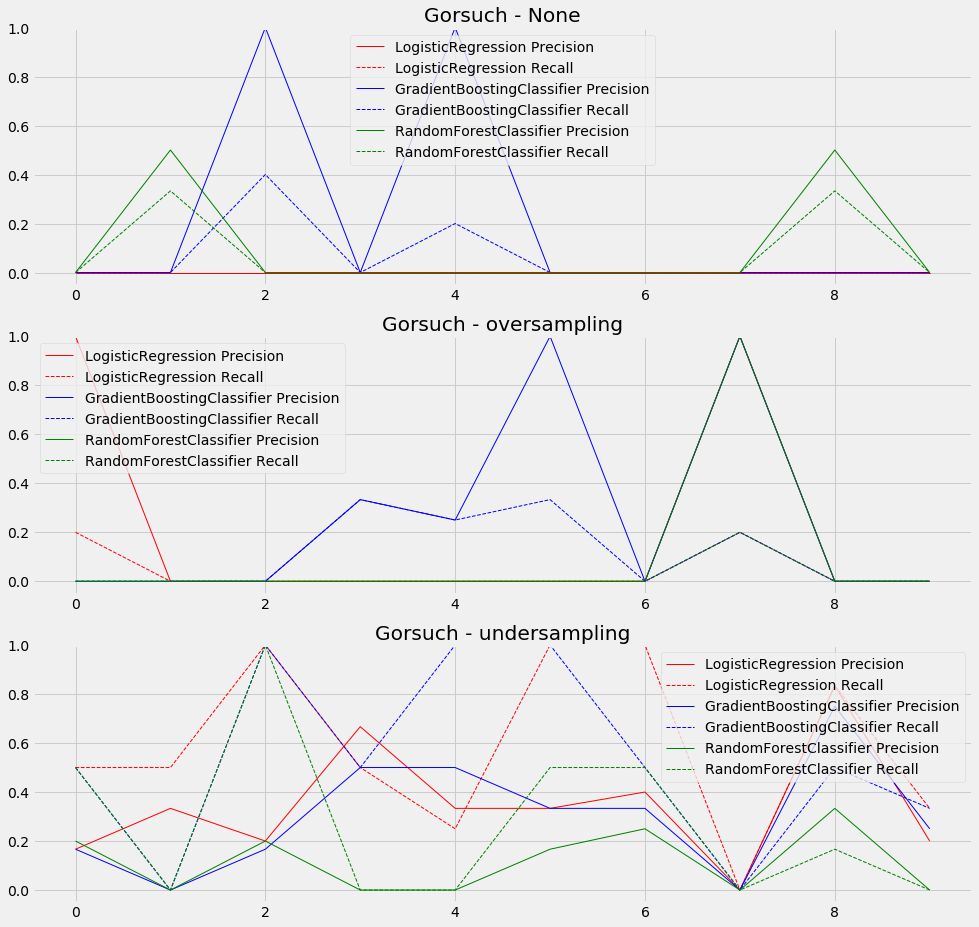

In [146]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

methods = [None, 'oversampling', 'undersampling']

for i, method in enumerate(methods):
    data = pd.read_csv('data/clean/Gorsuch.csv')
    data['cleanText'] = data['cleanText'].fillna(' ')
    models = [LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier()]
    plot_cross_val(models, data, ax[i], names=[m.__class__.__name__ for m in models], sampling_method=method)
    ax[i].set_title('Gorsuch - %s' % (str(method)))
    ax[i].legend()
    ax[i].set_ylim(-0.05, 1)
    
    

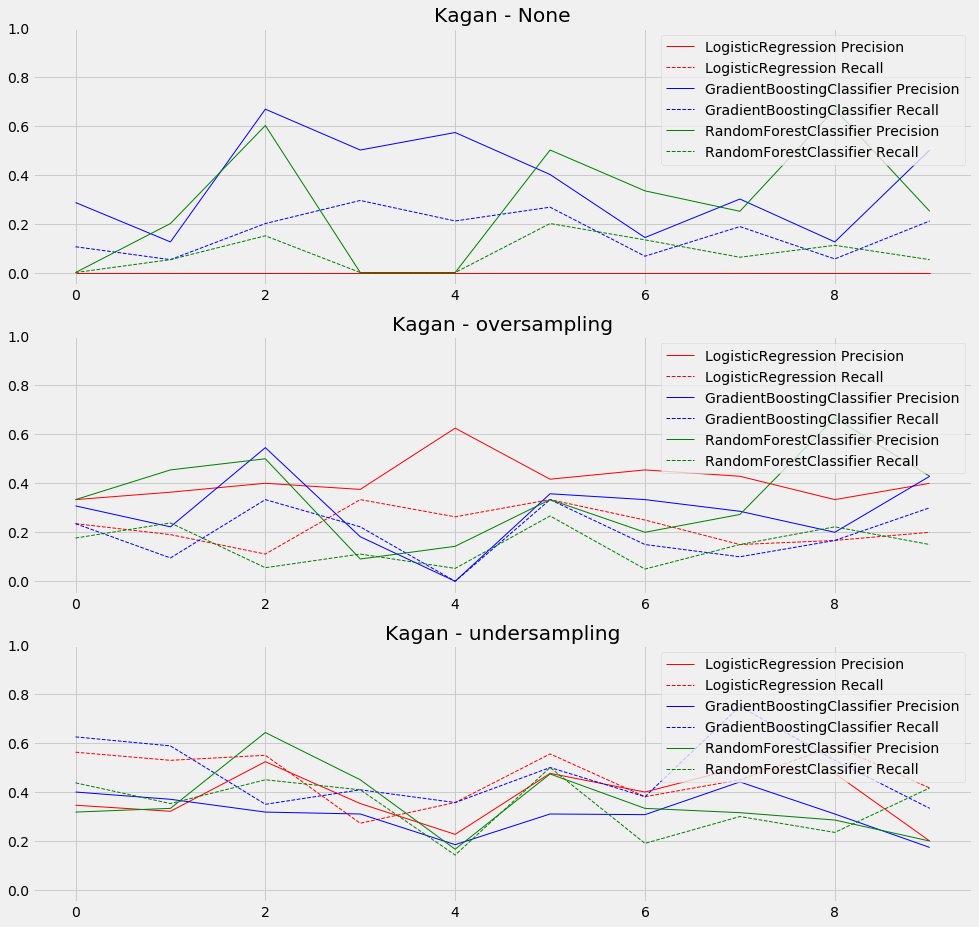

In [147]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

methods = [None, 'oversampling', 'undersampling']

for i, method in enumerate(methods):
    data = pd.read_csv('data/clean/Kagan.csv')
    data['cleanText'] = data['cleanText'].fillna(' ')
    models = [LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier()]
    plot_cross_val(models, data, ax[i], names=[m.__class__.__name__ for m in models], sampling_method=method)
    ax[i].set_title('Kagan - %s' % (str(method)))
    ax[i].legend()
    ax[i].set_ylim(-0.05, 1)
    
    

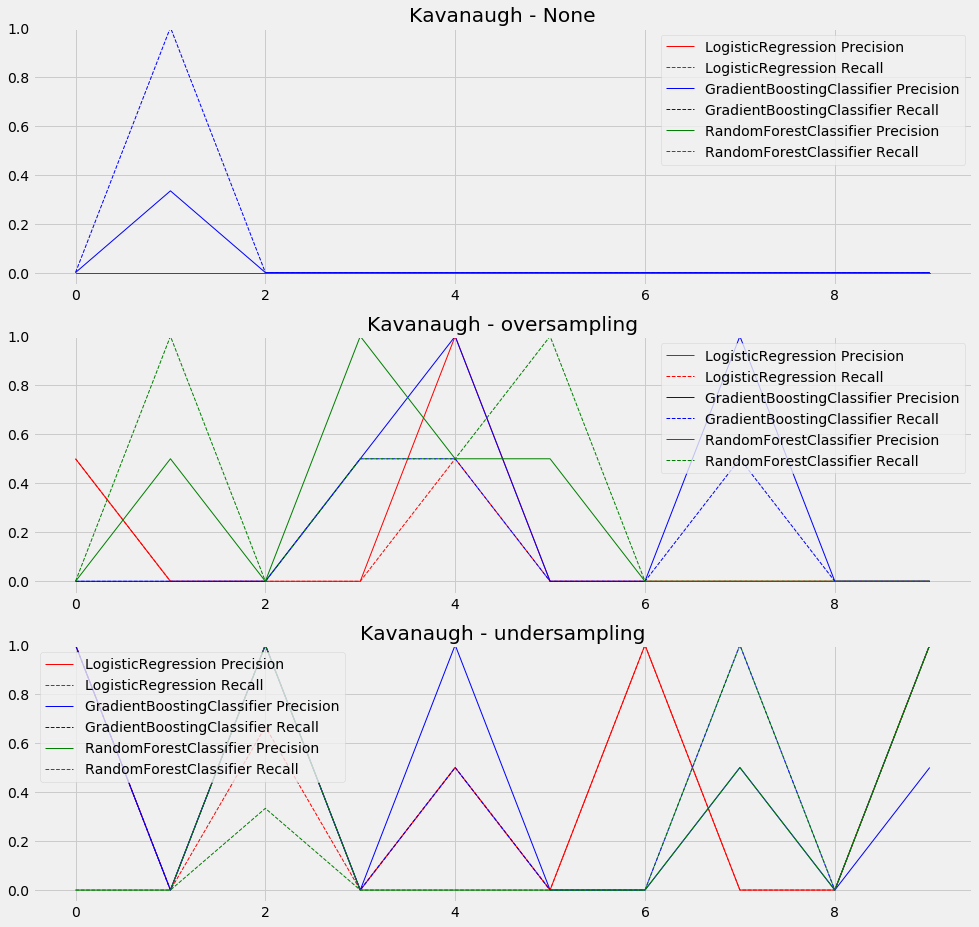

In [148]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

methods = [None, 'oversampling', 'undersampling']

for i, method in enumerate(methods):
    data = pd.read_csv('data/clean/Kavanaugh.csv')
    data['cleanText'] = data['cleanText'].fillna(' ')
    models = [LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier()]
    plot_cross_val(models, data, ax[i], names=[m.__class__.__name__ for m in models], sampling_method=method)
    ax[i].set_title('Kavanaugh - %s' % (str(method)))
    ax[i].legend()
    ax[i].set_ylim(-0.05, 1)
    
    

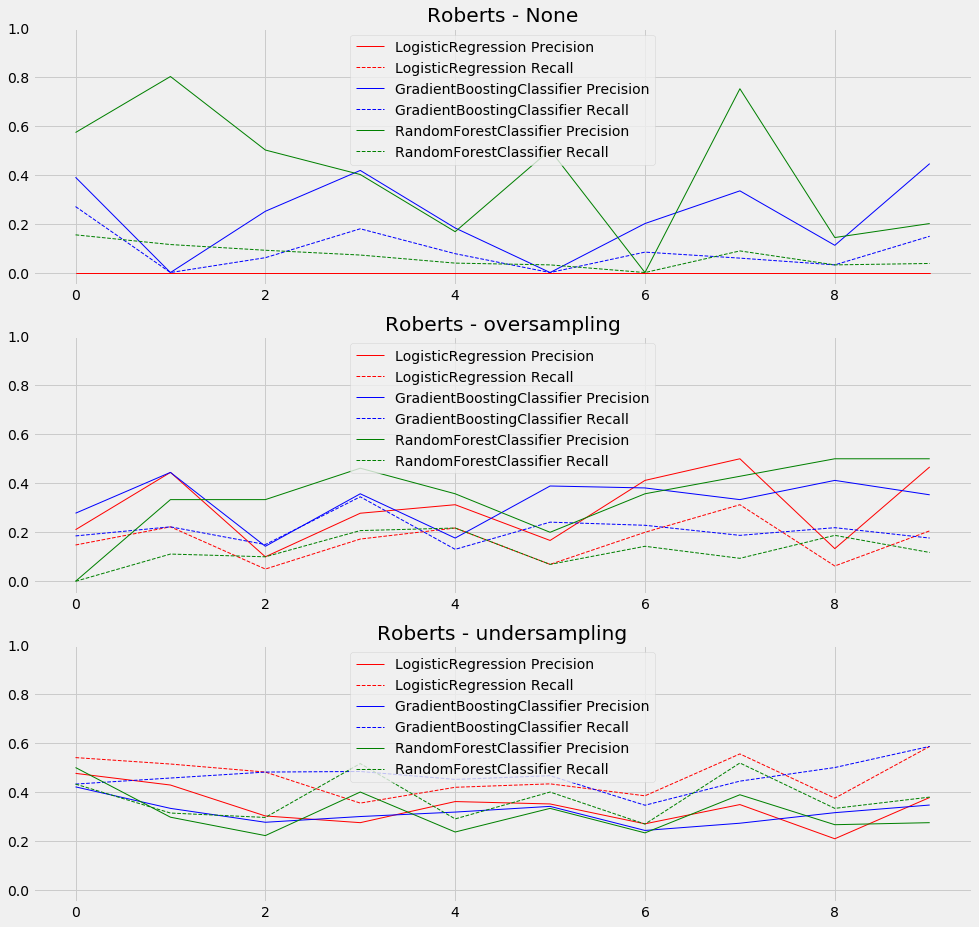

In [149]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

methods = [None, 'oversampling', 'undersampling']

for i, method in enumerate(methods):
    data = pd.read_csv('data/clean/Roberts.csv')
    data['cleanText'] = data['cleanText'].fillna(' ')
    models = [LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier()]
    plot_cross_val(models, data, ax[i], names=[m.__class__.__name__ for m in models], sampling_method=method)
    ax[i].set_title('Roberts - %s' % (str(method)))
    ax[i].legend()
    ax[i].set_ylim(-0.05, 1)
    
    

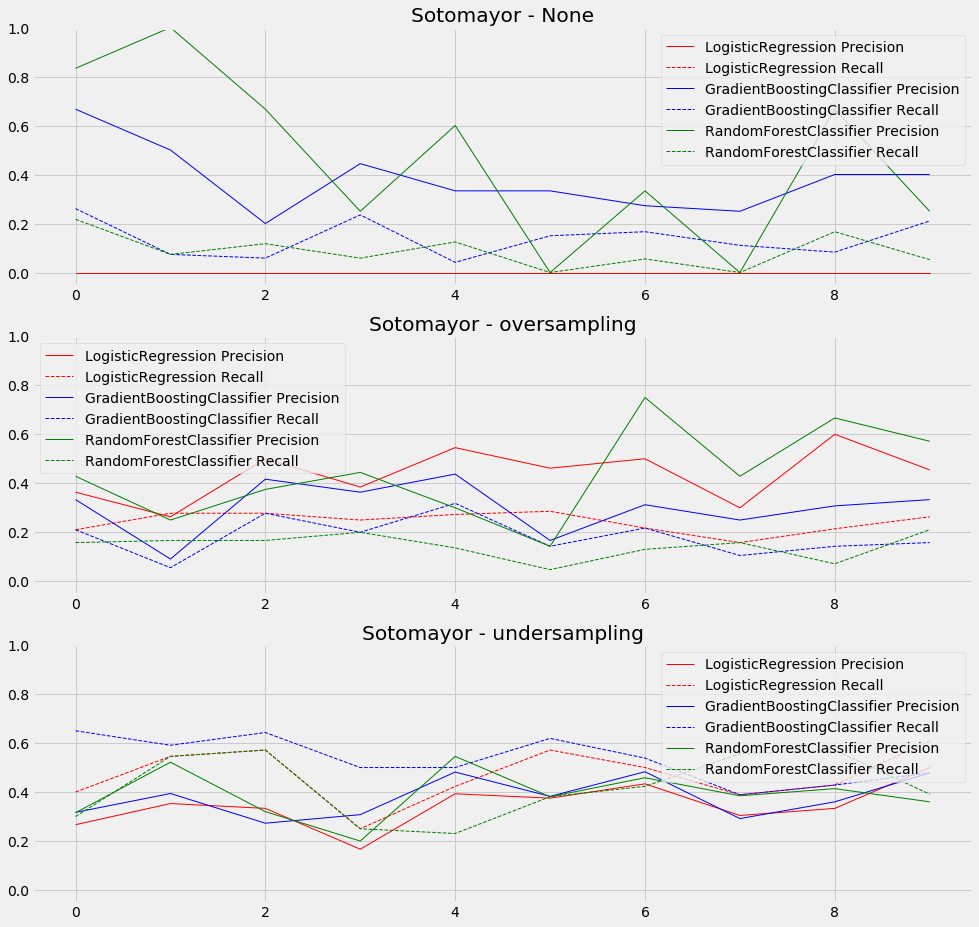

In [150]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

methods = [None, 'oversampling', 'undersampling']

for i, method in enumerate(methods):
    data = pd.read_csv('data/clean/Sotomayor.csv')
    data['cleanText'] = data['cleanText'].fillna(' ')
    models = [LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier()]
    plot_cross_val(models, data, ax[i], names=[m.__class__.__name__ for m in models], sampling_method=method)
    ax[i].set_title('Sotomayor - %s' % (str(method)))
    ax[i].legend()
    ax[i].set_ylim(-0.05, 1)
    
    

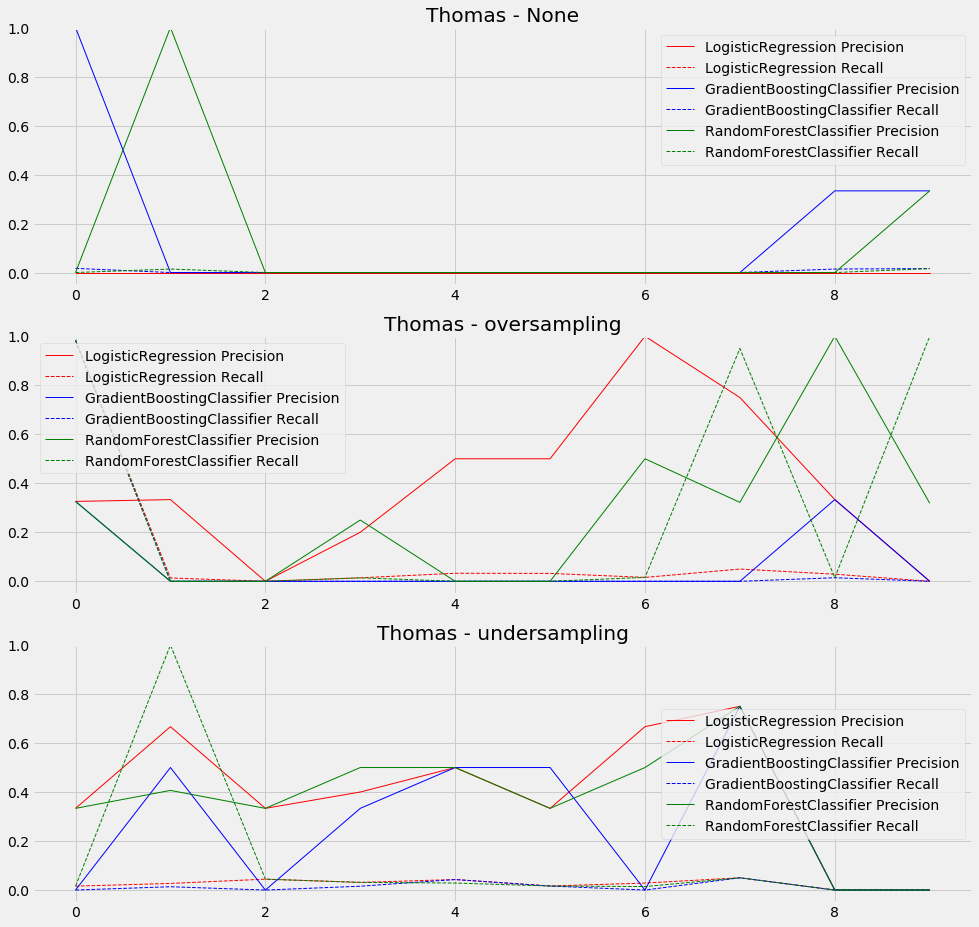

In [151]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

methods = [None, 'oversampling', 'undersampling']

for i, method in enumerate(methods):
    data = pd.read_csv('data/clean/Thomas.csv')
    data['cleanText'] = data['cleanText'].fillna(' ')
    models = [LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier()]
    plot_cross_val(models, data, ax[i], names=[m.__class__.__name__ for m in models], sampling_method=method)
    ax[i].set_title('Thomas - %s' % (str(method)))
    ax[i].legend()
    ax[i].set_ylim(-0.05, 1)
    
    